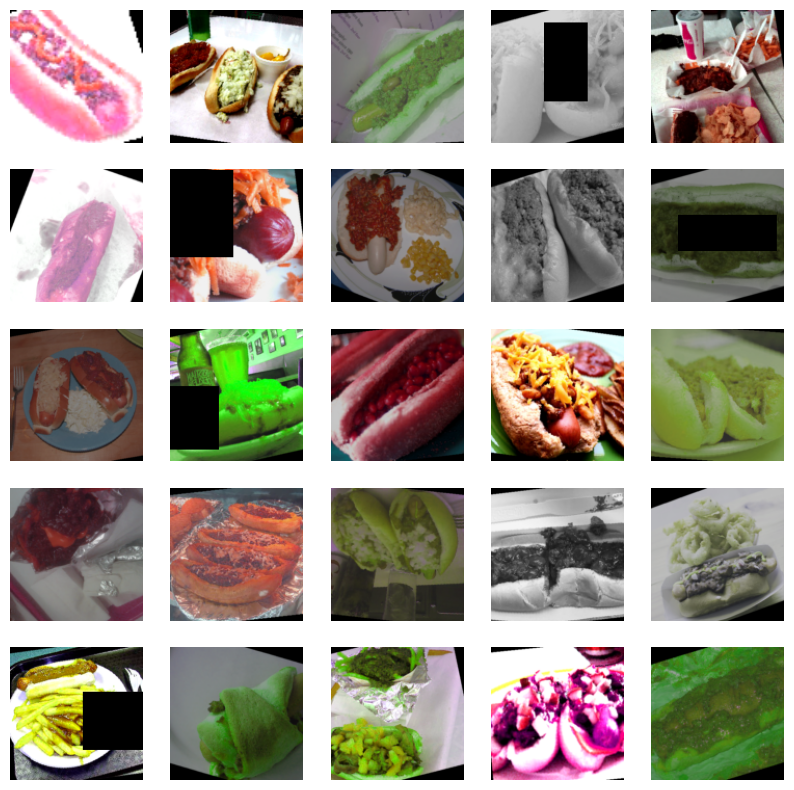

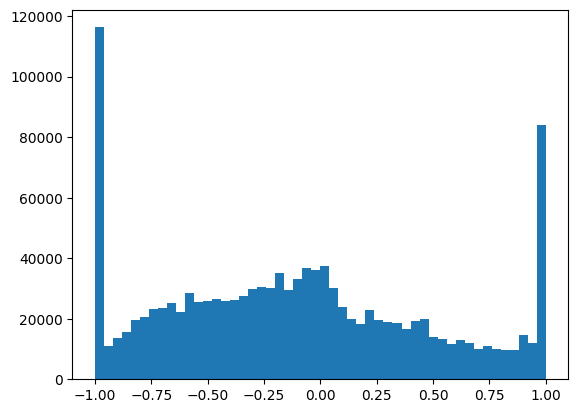

In [1]:
from datasets import Hotdog_NotHotdog
import matplotlib.pyplot as plt
import torch

dataset = Hotdog_NotHotdog(train=True, image_size=128)

batch = torch.stack([
    dataset[i]['input'] for i in range(25)
]).permute(0, 2, 3, 1)

fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs : list[plt.Axes]
axs = axs.flatten()

for i in range(25):
    img = batch[i]
    img = (img + 1) / 2
    axs[i].imshow(img.numpy())
    axs[i].axis('off')
    
plt.show()

plt.hist(batch.flatten(), bins=50)
plt.show()